In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime , timedelta
import seaborn as sns
sns.set()


## Downloading the historical data of a Stock

In [2]:
ticker_symbol = "MSFT"

In [3]:
start_date = datetime(year=2019, month=1, day=1)  # Specify January 1st, 2019
end_date = datetime(year=2022, month=1, day=1)  # Specify January 1st, 2022

In [4]:
# Download historical data
msft_data = yf.download(ticker_symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

[*********************100%%**********************]  1 of 1 completed


In [5]:
msft_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,99.550003,101.750000,98.940002,101.120003,95.846016,35329300
2019-01-03,100.099998,100.190002,97.199997,97.400002,92.320038,42579100
2019-01-04,99.720001,102.510002,98.930000,101.930000,96.613785,44060600
2019-01-07,101.639999,103.269997,100.980003,102.059998,96.736969,35656100
2019-01-08,103.040001,103.970001,101.709999,102.800003,97.438416,31514400


In [6]:
df = msft_data.copy()

## Data Cleaning and Exploration

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,757.000000,757.000000,757.000000,757.000000,757.000000,7.570000e+02
mean,199.630132,201.563303,197.697067,199.774042,193.594799,2.942875e+07
std,65.180834,65.653665,64.729467,65.246818,64.921714,1.308182e+07
min,99.550003,100.190002,97.199997,97.400002,92.320038,8.989200e+06
25%,139.589996,140.380005,138.000000,139.059998,133.273773,2.145900e+07
50%,200.419998,203.949997,197.740005,201.910004,195.281815,2.595970e+07
75%,243.929993,245.600006,242.149994,243.789993,237.521561,3.332740e+07
max,344.619995,349.670013,342.200012,343.109985,336.315277,9.701270e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2019-01-02 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       757 non-null    float64
 1   High       757 non-null    float64
 2   Low        757 non-null    float64
 3   Close      757 non-null    float64
 4   Adj Close  757 non-null    float64
 5   Volume     757 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.4 KB


In [9]:
data = df['Close']
data

Date
2019-01-02    101.120003
2019-01-03     97.400002
2019-01-04    101.930000
2019-01-07    102.059998
2019-01-08    102.800003
                 ...    
2021-12-27    342.450012
2021-12-28    341.250000
2021-12-29    341.950012
2021-12-30    339.320007
2021-12-31    336.320007
Name: Close, Length: 757, dtype: float64

In [10]:
data_resampled = data.resample('D').mean()
data_resampled

Date
2019-01-02    101.120003
2019-01-03     97.400002
2019-01-04    101.930000
2019-01-05           NaN
2019-01-06           NaN
                 ...    
2021-12-27    342.450012
2021-12-28    341.250000
2021-12-29    341.950012
2021-12-30    339.320007
2021-12-31    336.320007
Freq: D, Name: Close, Length: 1095, dtype: float64

In [11]:
data_resampled.isna().sum()

338

In [12]:
data_resampled = data_resampled.fillna(method='ffill')


In [13]:
data_resampled.isna().sum()

0

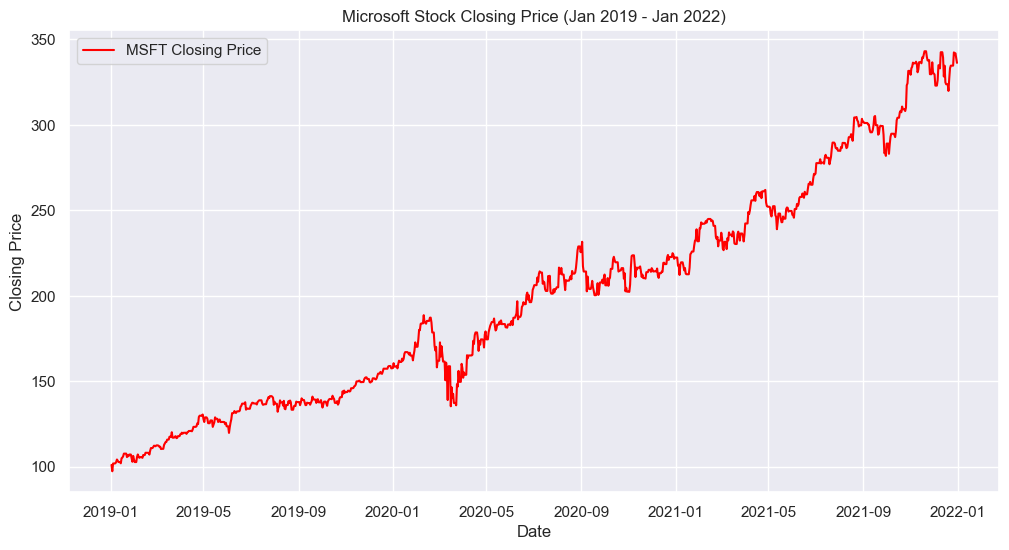

In [14]:
import numpy as np

# Visualize closing price time series
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(data_resampled, label='MSFT Closing Price' , color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Microsoft Stock Closing Price (Jan 2019 - Jan 2022)')
plt.legend()
plt.grid(True)
plt.show()

##  Check for Stationarity

In [15]:
# KPSS Test

In [16]:
from statsmodels.tsa.stattools import kpss , adfuller

In [17]:
stats, p, lags, critical_values = kpss(data_resampled)

C:\Users\abhay\AppData\Local\Temp\ipykernel_22380\1462686450.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p, lags, critical_values = kpss(data_resampled)


In [18]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critial Values: {critical_values}')

if p < 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 5.080184868176182
p-value: 0.01
Critial Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not Stationary


In [19]:
# ADF Test 

In [20]:
result = adfuller(data_resampled)
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 0.407360806552541
p-value: 0.9817681317372247
Critial Values: {'1%': -3.4364533503600962, '5%': -2.864234857527328, '10%': -2.568204837482531}
Series is not Stationary


## Data Preprocessing

In [21]:
# Create a differenced series (d=1)
differenced_data = data_resampled.diff(1).dropna()
differenced_data

Date
2019-01-03   -3.720001
2019-01-04    4.529999
2019-01-05    0.000000
2019-01-06    0.000000
2019-01-07    0.129997
                ...   
2021-12-27    7.760010
2021-12-28   -1.200012
2021-12-29    0.700012
2021-12-30   -2.630005
2021-12-31   -3.000000
Freq: D, Name: Close, Length: 1094, dtype: float64

In [22]:
# Checking for Stationarity

stats, p, lags, critical_values = kpss(differenced_data)
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critial Values: {critical_values}')

if p < 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 0.08611644766975327
p-value: 0.1
Critial Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is Stationary


C:\Users\abhay\AppData\Local\Temp\ipykernel_22380\429095635.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stats, p, lags, critical_values = kpss(differenced_data)


In [23]:
result = adfuller(differenced_data)
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: -7.566760281577956
p-value: 2.911922675269414e-11
Critial Values: {'1%': -3.4364533503600962, '5%': -2.864234857527328, '10%': -2.568204837482531}
Series is Stationary


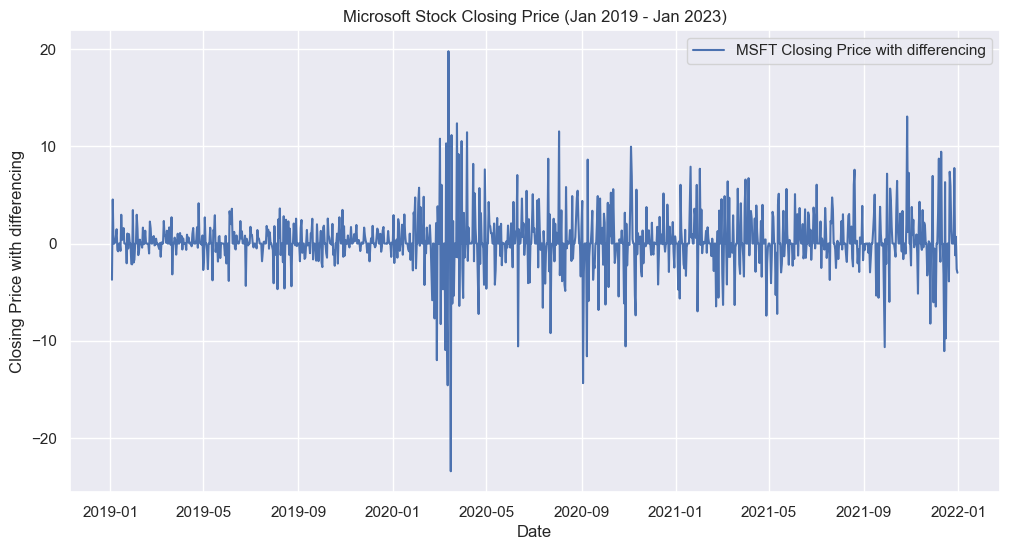

In [24]:
# Visualize closing price time series
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(differenced_data, label='MSFT Closing Price with differencing')
plt.xlabel('Date')
plt.ylabel('Closing Price with differencing')
plt.title('Microsoft Stock Closing Price (Jan 2019 - Jan 2023)')
plt.legend()
plt.grid(True)
plt.show()

### Plotting the ACF and PACF plots

In [25]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

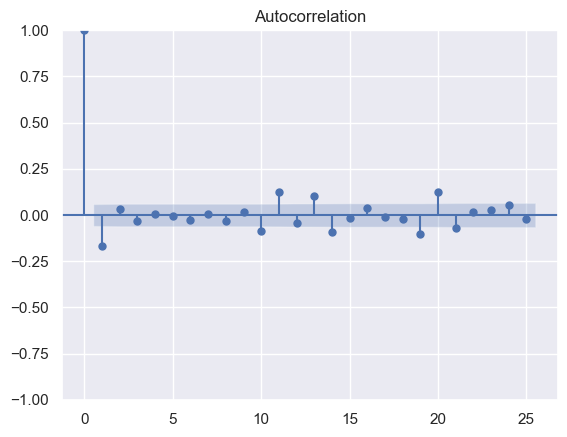

In [26]:
plot_acf(differenced_data , lags=25)
plt.show()

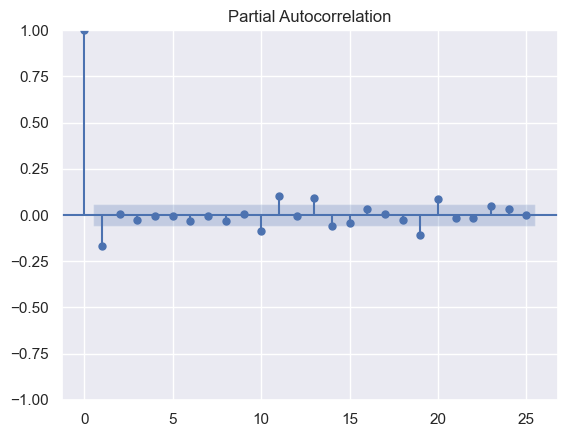

In [27]:
plot_pacf(differenced_data , lags=25)
plt.show()

In [28]:
# After seeing the plots I got two values for p and q each
# 1. (p=1 and q=1)
# 2. (p=9 and q=9) 

## Splitting the data into train and test data

In [29]:
train_size = int(len(data_resampled) * 0.9)
train, test = data_resampled[:train_size], data_resampled[train_size:]
len(train) , len(test)

(985, 110)

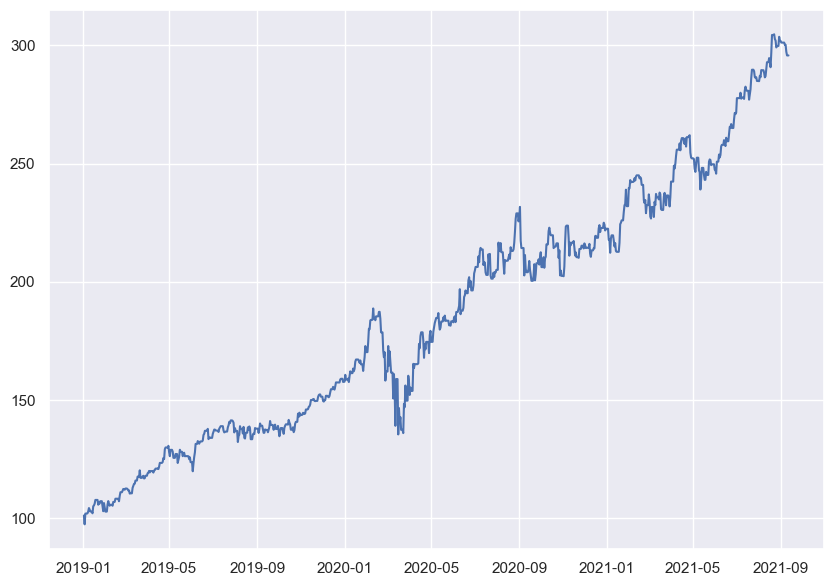

In [30]:
plt.figure(figsize=(10 , 7))
plt.plot(train)
plt.show()


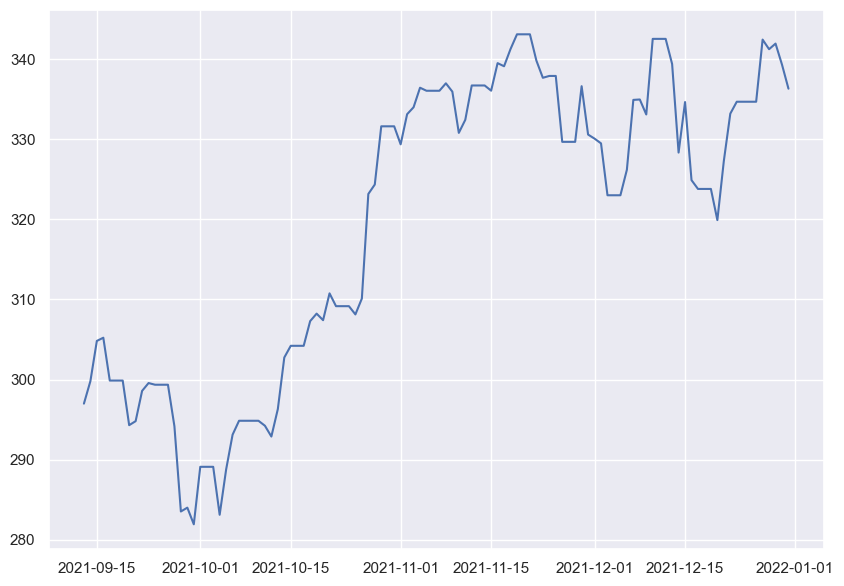

In [31]:
plt.figure(figsize=(10 , 7))
plt.plot(test)
plt.show()


In [32]:
len(data_resampled) == len(test)+len(train)

True

In [33]:
train

Date
2019-01-02    101.120003
2019-01-03     97.400002
2019-01-04    101.930000
2019-01-05    101.930000
2019-01-06    101.930000
                 ...    
2021-09-08    300.209991
2021-09-09    297.250000
2021-09-10    295.709991
2021-09-11    295.709991
2021-09-12    295.709991
Freq: D, Name: Close, Length: 985, dtype: float64

In [34]:
test

Date
2021-09-13    296.989990
2021-09-14    299.790009
2021-09-15    304.820007
2021-09-16    305.220001
2021-09-17    299.869995
                 ...    
2021-12-27    342.450012
2021-12-28    341.250000
2021-12-29    341.950012
2021-12-30    339.320007
2021-12-31    336.320007
Freq: D, Name: Close, Length: 110, dtype: float64

## Fitting the model

In [35]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [36]:
model = pm.auto_arima(data_resampled, 
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5498.081, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5468.621, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5469.517, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5501.759, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5470.585, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5470.567, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5472.399, Time=2.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5474.615, Time=0.17 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 4.095 seconds


### Evaluate Model Performance

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1095
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -2731.311
Date:                Mon, 11 Mar 2024   AIC                           5468.621
Time:                        20:11:39   BIC                           5483.614
Sample:                    01-02-2019   HQIC                          5474.295
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2523      0.090      2.799      0.005       0.076       0.429
ar.L1         -0.1685      0.019     -9.095      0.000      -0.205      -0.132
sigma2         8.6309      0.164     52.602      0.000       8.309       8.952
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3330.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               5.44   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
model.fit(train)


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [39]:
forecast=model.predict(n_periods=len(test), return_conf_int=True)
forecast

(2021-09-13    295.949217
 2021-09-14    296.139314
 2021-09-15    296.339500
 2021-09-16    296.537615
 2021-09-17    296.736154
                  ...    
 2021-12-27    316.781336
 2021-12-28    316.979803
 2021-12-29    317.178271
 2021-12-30    317.376738
 2021-12-31    317.575205
 Freq: D, Length: 110, dtype: float64,
 array([[290.45156221, 301.44687247],
        [289.11727458, 303.16135369],
        [287.94465054, 304.7343503 ],
        [286.98763523, 306.0875941 ],
        [286.15221133, 307.32009753],
        [285.40988236, 308.45933126],
        [284.73862443, 309.52752984],
        [284.12454301, 310.53854455],
        [283.55762986, 311.50239249],
        [283.03052015, 312.42643668],
        [282.53758178, 313.3163096 ],
        [282.07439852, 314.17642739],
        [281.63743041, 315.01033005],
        [281.22378828, 315.82090671],
        [280.83107765, 316.61055188],
        [280.45728763, 317.38127643],
        [280.10071009, 318.13478851],
        [279.7598794 , 318.87

In [40]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])
forecast_df

,Prediction
Date,
2021-09-13,295.949217
2021-09-14,296.139314
2021-09-15,296.339500
2021-09-16,296.537615
2021-09-17,296.736154
...,...
2021-12-27,316.781336
2021-12-28,316.979803
2021-12-29,317.178271


In [41]:
lower=pd.Series(forecast[1][:, 0], index =test.index)
upper=pd.Series(forecast[1][:, 1], index =test.index)

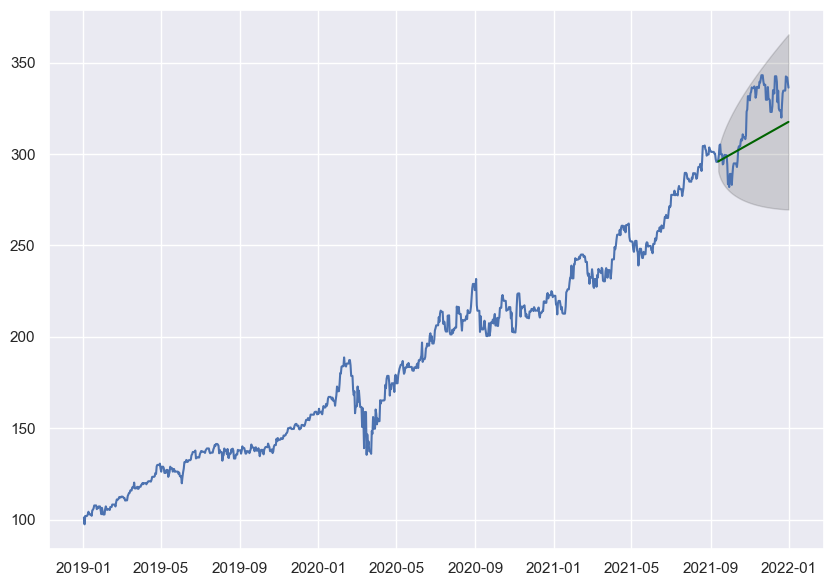

In [42]:
plt.figure(figsize=(10, 7))
plt.plot(data_resampled)
plt.plot(forecast_df, color='darkgreen')
plt.fill_between(test.index, 
                 lower, 
                 upper, 
                 color='k', alpha=.15)

## Simulate Buying and Selling Stock Using ARIMA(p,d,q)

In [43]:
def run_simulation_with_model(returns, prices, amt, thresh,order, verbose=False, plot=True):
    curr_holding = False
    events_list = []
    init_amt = amt

    # Go through dates
    for date, r in tqdm(returns.iloc[14:].items(), total=len(returns.iloc[14:])):
        # If you're currently holding the stock, sell it
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding = False
            ret = (sell_price - buy_price) / buy_price
            amt *= (1 + ret)
            events_list.append(('s', date, ret))
            
            if verbose:
                print('Sold at $%s' % sell_price)
                print('Actual Return: %s' % (round(ret, 4)))
                print('=======================================')
            continue

        # Get data until just before the current date
        curr_data = returns[:date]
        
        if type(order) == tuple:
            try:
                model = ARIMA(curr_data , order=order)
                model_fit = model.fit()
                pred =  model_fit.forecast(steps=1)
            except:
                pred = thresh - 1

        # If you predict a high enough return and not holding, buy stock
        if (not curr_holding) and \
                ((pred.values[0] > thresh) or (order == 'last' and curr_data[-1] > 0)):

            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s' % buy_price)

    if verbose:
        print('Total Amount: $%s' % round(amt, 2))

    # Graph
    if plot:
        plt.figure(figsize=(10, 4))
        plt.plot(prices[14:])

        y_lims = (int(prices.min() * 0.95), int(prices.max() * 1.05))
        shaded_y_lims = int(prices.min() * 0.5), int(prices.max() * 1.5)

        for idx, event in enumerate(events_list):
            plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
            if event[0] == 's':
                color = 'green' if event[2] > 0 else 'red'
                plt.fill_betweenx(range(*shaded_y_lims),
                                  event[1], events_list[idx - 1][1], color=color, alpha=0.1)

        tot_return = round(100 * (amt / init_amt - 1), 2)
        tot_return = str(tot_return) + '%'
        plt.title("%s Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s" % (
        ticker_symbol, thresh, round(amt, 2), tot_return), fontsize=20)
        plt.ylim(*y_lims)
        plt.show()

    return amt


In [44]:
new_start_date = datetime(year=2023, month=1, day=1) 
new_end_date = datetime(year=2023, month=4, day=1) 

In [45]:
new_data = yf.download(ticker_symbol, start=new_start_date.strftime('%Y-%m-%d'), end=new_end_date.strftime('%Y-%m-%d'))

[*********************100%%**********************]  1 of 1 completed


In [46]:
prices = new_data.Close
returns = prices.pct_change().dropna()

Text(0, 0.5, 'Prices')

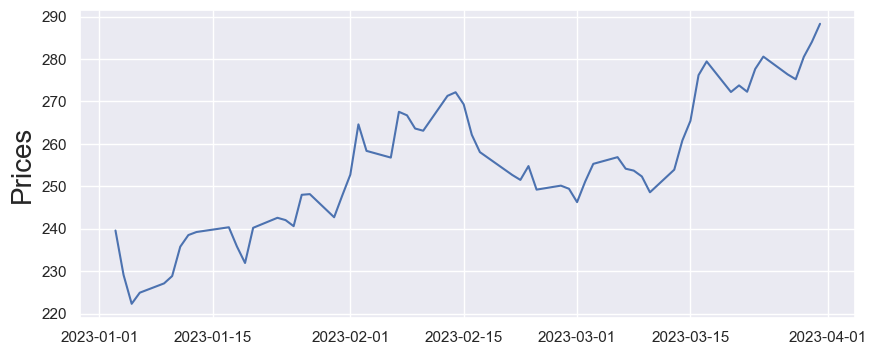

In [47]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Prices', fontsize=20)

Text(0, 0.5, 'Return')

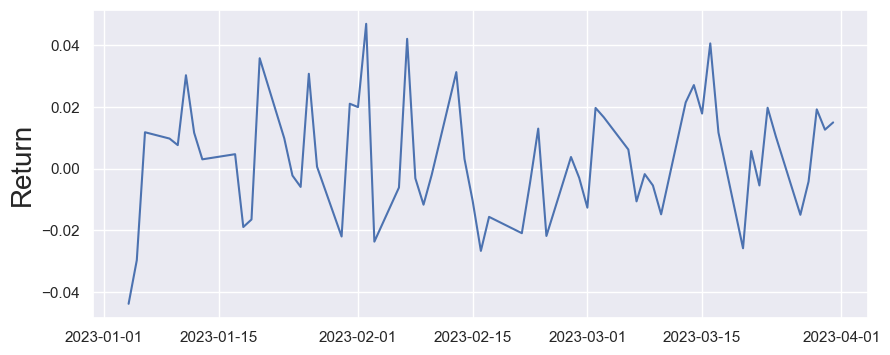

In [48]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Return', fontsize=20)

In [52]:
result = adfuller(returns)
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: -6.900006383112423
p-value: 1.2892837879063548e-09
Critial Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
Series is Stationary


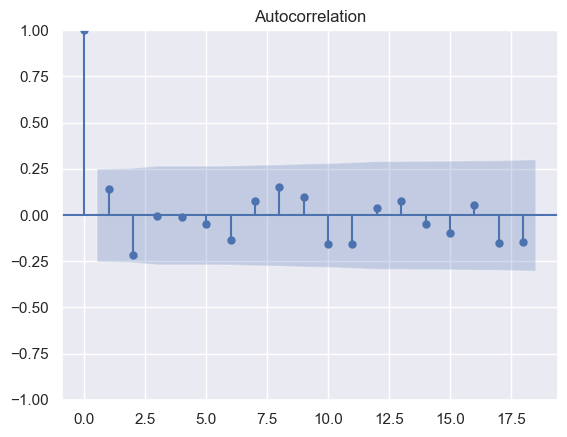

In [57]:
plot_acf(returns)
plt.show()

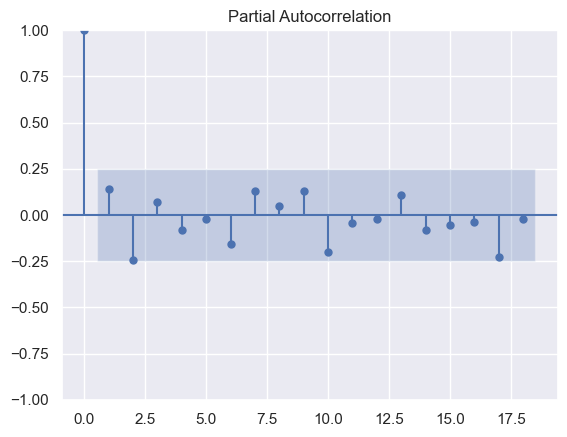

In [54]:
plot_pacf(returns)
plt.show()

In [58]:
# taking p =2 and q = 2 and d = 0

### Trying simulating ARIMA() Model for stock trading

In [59]:
from tqdm import tqdm
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import warnings

#in practice do not supress these warnings, they carry important information about the status of your model
warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=HessianInversionWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [60]:
returns

Date
2023-01-04   -0.043743
2023-01-05   -0.029638
2023-01-06    0.011785
2023-01-09    0.009736
2023-01-10    0.007617
                ...   
2023-03-27   -0.014934
2023-03-28   -0.004161
2023-03-29    0.019184
2023-03-30    0.012620
2023-03-31    0.014962
Name: Close, Length: 61, dtype: float64

  0%|          | 0/47 [00:00<?, ?it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
  2%|▏         | 1/47 [00:00<00:16,  2.85it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
  4%|▍         | 2/47 [00:00<00:16,  2.81it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
  9%|▊         | 4/47 [00:01<00:11,  3.88it/s]D:\Apps\Anaconda\Lib\site-packages\statsmode

 83%|████████▎ | 39/47 [00:11<00:02,  2.94it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 87%|████████▋ | 41/47 [00:11<00:01,  3.27it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 91%|█████████▏| 43/47 [00:12<00:01,  3.44it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 96%|█████████▌| 45/47 [00:12<00:00,  3.56it/s]D:\Apps\Anaconda\Lib\site-packag

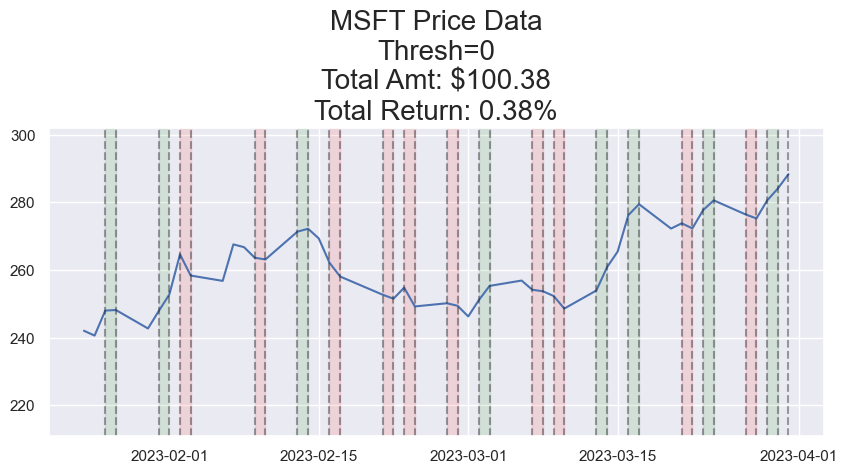

  0%|          | 0/47 [00:00<?, ?it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
  2%|▏         | 1/47 [00:00<00:17,  2.64it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
  4%|▍         | 2/47 [00:00<00:16,  2.74it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
  9%|▊         | 4/47 [00:01<00:11,  3.84it/s]D:\Apps\Anaconda\Lib\site-packages\statsmode

 81%|████████  | 38/47 [00:11<00:02,  3.50it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 83%|████████▎ | 39/47 [00:11<00:02,  3.01it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 87%|████████▋ | 41/47 [00:12<00:01,  3.28it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 91%|█████████▏| 43/47 [00:12<00:01,  3.43it/s]D:\Apps\Anaconda\Lib\site-packag

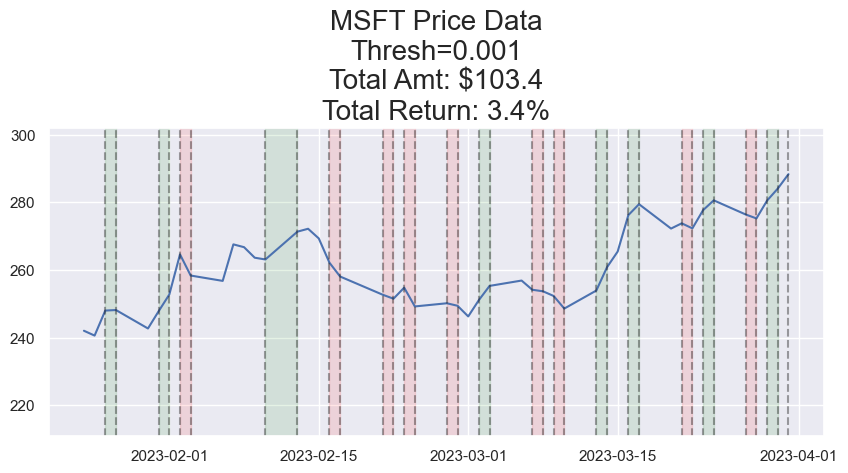

  0%|          | 0/47 [00:00<?, ?it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
  2%|▏         | 1/47 [00:00<00:16,  2.84it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
  4%|▍         | 2/47 [00:00<00:15,  2.81it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
  9%|▊         | 4/47 [00:01<00:11,  3.87it/s]D:\Apps\Anaconda\Lib\site-packages\statsmode

 64%|██████▍   | 30/47 [00:10<00:07,  2.31it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 68%|██████▊   | 32/47 [00:10<00:04,  3.01it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 70%|███████   | 33/47 [00:11<00:05,  2.66it/s]D:\Apps\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 74%|███████▍  | 35/47 [00:11<00:03,  3.14it/s]D:\Apps\Anaconda\Lib\site-packag

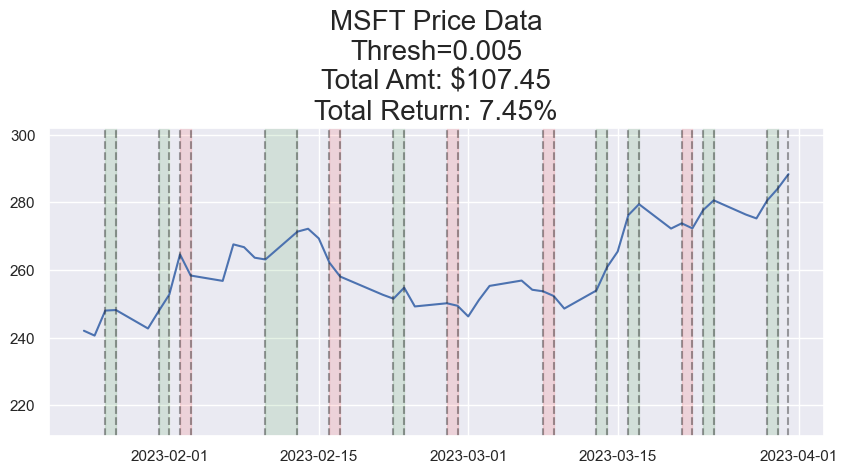

In [61]:
# Assuming you have a prebuilt ARIMA model named 'prebuilt_model'
for thresh in [0, 0.001, 0.005]:
    run_simulation_with_model(returns=returns, prices=prices, amt=100,  thresh=thresh, order=(2 , 0, 2), verbose=False, plot=True)